# Tensorfow Tutorial 2

In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from IPython import display
import pandas as pd
import matplotlib.pyplot as plt
import os

## Calculus

### Derivatives and Differentiation

In [3]:
# f(x) = 3x^2-4x --> f'(x) = 6x-4 
def f(x):
    return 3 * x ** 2 - 4 * x

By setting  x=1  and letting h approach 0, the numerical result of f(x+h)−f(x)/h  approaches 2.

In [4]:
def numerical_lim(f, x, h):
    return (f(x+h) - f(x)) / h

h = 0.1
x = 1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, x, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


retta generica passante per un punto:

$ (y - y_0) = m (x - x_0)$, dove m è il coefficiente angolare

posso sostituire il coefficiente angolare $m$ con la derivata prima della funzione calcolata nel punto $ x_0 $:

$ (y - y_0) = f'(x_0) (x - x_0) $

Esempio: retta tangente alla funzione $ f(x)=3x^2-4x $ nel punto $ x_0 = 1 $

$ y_0 = f(1) = 3*1^2-4*1 = -1 $

$ p(x_0,y_0) $ --> $ p(1,-1) $

$ f'(x) = 6x-4 $

$ m = f'(x) = f'(1) = 2 $

equazione della retta tangente: $ (y - -1) = 2 (x - 1) $ -> $ y = 2x-3 $



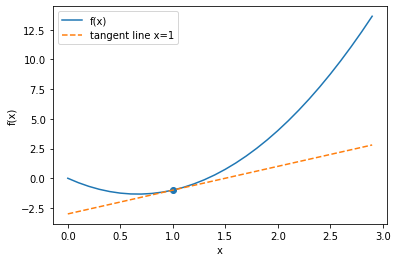

In [5]:
x = np.arange(0, 3, 0.1)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, f(x), label='f(x)')
plt.plot(x, 2*x-3, label='tangent line x=1', linestyle='dashed')
plt.legend(loc='upper left', shadow=False)
plt.scatter(1,-1)

## Automatic Differentiation

$ y=2x^⊤x $

In [6]:
x = tf.range(4, dtype=tf.float32)
x

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>

In [7]:
x = tf.Variable(x)
x

<tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>

In [8]:
# Record all computations onto a tape
with tf.GradientTape() as t:
    y = 2 * tf.tensordot(x, x, axes=1)
y

<tf.Tensor: shape=(), dtype=float32, numpy=28.0>

Since x is a vector of length 4, an inner product of x and x is performed, yielding the scalar output that we assign to y. Next, we can automatically calculate the gradient of y with respect to each component of x by calling the function for backpropagation and printing the gradient.

In [9]:
x_grad = t.gradient(y, x)
x_grad

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.,  4.,  8., 12.], dtype=float32)>

$ y = 2 * (x_1^2 + x_2^2 + x_3^2 + x_4^2) $

$ y = 2 * (0^2 + 1^2 + 2^2 + 3^2) = 28 $

derivate parziali:

$ \frac{dy}{dx_1} = 2 * (2x_1 + 0 + 0 + 0) = 0\\ $
$ \frac{dy}{dx_2} = 2 * (0 + 2x_2 + 0 + 0) = 4\\ $
$ \frac{dy}{dx_3} = 2 * (0 + 0 + 2x_3 + 0) = 8\\ $
$ \frac{dy}{dx_4} = 2 * (0 + 0 + 0 + 2x_4) = 12\\ $

$ \frac{dy}{dx} = 2 * 2x = 4x\\ $




In [12]:
x_grad == 4*x

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>